## Task 1: Text Preprocessing and Basic Analysis with NLTK

In [1]:
# 1.1
# Load the text file

import nltk
nltk.download('punkt')

with open("Harry_Potter_Book1.txt", "r", encoding='utf-8') as file:
    text=file.read()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/charlesbelinky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# 1.2
# tokenize sentences and words. Print lens of sentences and tokens and only print the first 20 words.

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

# tokwnize sentences
tokens = word_tokenize(text)
sentences = sent_tokenize(text)

# store lengths in variables
num_words = len(tokens)
num_sentences = len(sentences)

# print statements
print("# of sentences: ", num_sentences)
print("# of words after tokenizing: ", num_words)
print(tokens[:20])

# of sentences:  6394
# of words after tokenizing:  98782
['Harry', 'Potter', 'and', 'the', 'Sorcerer', "'s", 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of', 'number']


In [3]:
# 1.3

from nltk.tokenize import RegexpTokenizer

# create a tokenizer using a regular expression pattern to match words (excluding punctuation)
tokenizer = RegexpTokenizer(r'\w+')

# tokenize the text into words without punctuation
no_punctuation_tokens = tokenizer.tokenize(text)

# count number of words without punctuation
num_no_punctuation_tokens = len(no_punctuation_tokens)

print("# of words after punctuation removal: ", num_no_punctuation_tokens)
print(no_punctuation_tokens[:20])

# of words after punctuation removal:  80669
['Harry', 'Potter', 'and', 'the', 'Sorcerer', 's', 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr', 'and', 'Mrs', 'Dursley', 'of', 'number', 'four']


In [96]:
# 1.4

from nltk.corpus import stopwords
from nltk.probability import FreqDist

# download the English stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# remove stop words from the list of tokens
filtered_tokens = [word for word in no_punctuation_tokens if word.lower() not in stop_words]

# count number of words without punctuation or stopwords
num_filtered_tokens = len(filtered_tokens)

print("# of words without stop words: ", num_filtered_tokens)
print(filtered_tokens[:20])

# print a FreqDist from the filtered tokens
print(FreqDist(filtered_tokens))

# of words without stop words:  40808
['Harry', 'Potter', 'Sorcerer', 'Stone', 'CHAPTER', 'ONE', 'BOY', 'LIVED', 'Mr', 'Mrs', 'Dursley', 'number', 'four', 'Privet', 'Drive', 'proud', 'say', 'perfectly', 'normal', 'thank']
<FreqDist with 6355 samples and 40808 outcomes>


[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


In [97]:
# 1.5

from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]

distinct_lemmatized_words = set(lemmatized_words)
num_distinct_lemmatized_words = len(distinct_lemmatized_words)

# Print the number of distinct lemmatized words
print("Number of distinct lemmatized words:", num_distinct_lemmatized_words)
print(FreqDist(distinct_lemmatized_words))

Number of distinct lemmatized words: 5870
<FreqDist with 5870 samples and 5870 outcomes>


[nltk_data] Error loading omw-1.4: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


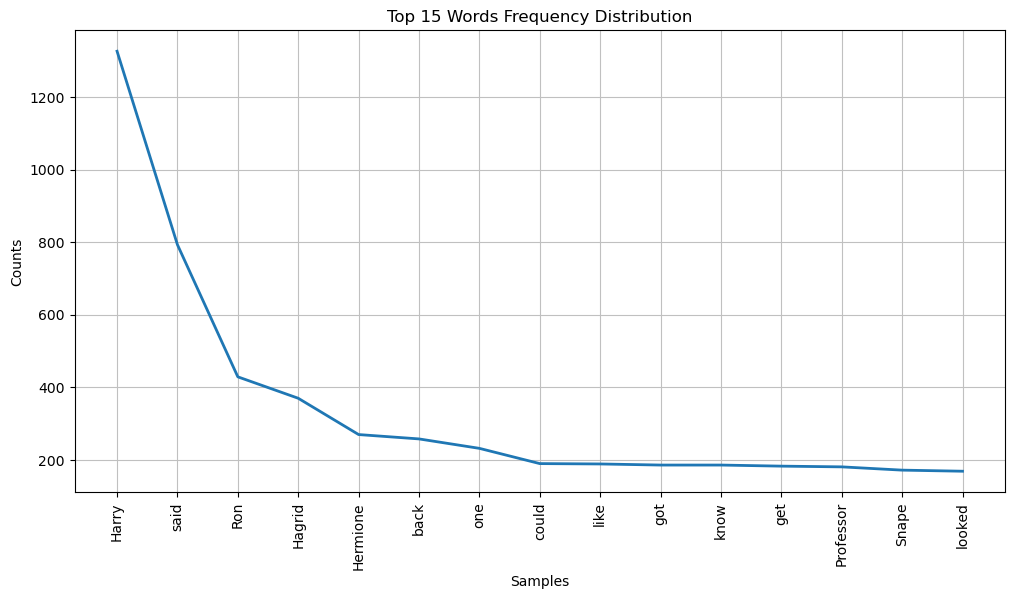

Harry: 1326
said: 793
Ron: 429
Hagrid: 370
Hermione: 270
back: 258
one: 232
could: 190
like: 189
got: 186
know: 186
get: 183
Professor: 181
Snape: 172
looked: 169


In [98]:
# 1.6

import matplotlib.pyplot as plt

fdist = FreqDist(filtered_tokens)

# Get the top 15 words and their frequencies
top_words = fdist.most_common(15)

# Plot the word distribution
plt.figure(figsize=(12, 6))
fdist.plot(15, title="Top 15 Words Frequency Distribution")
plt.show()

# Print the top 15 words and their frequencies
for word, frequency in top_words:
    print(f"{word}: {frequency}")

## Task 2: Word Clouds

(-0.5, 399.5, 199.5, -0.5)

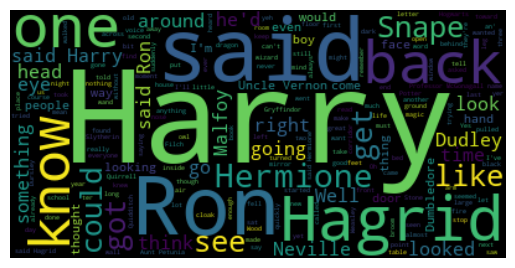

In [99]:
# 2.1

import os

from os import path
from wordcloud import WordCloud

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
text = open(path.join(d, "Harry_Potter_Book1.txt")).read()


wordcloud = WordCloud(stopwords=stop_words).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


# wordcloud = WordCloud(max_font_size=40).generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

(-0.5, 399.5, 199.5, -0.5)

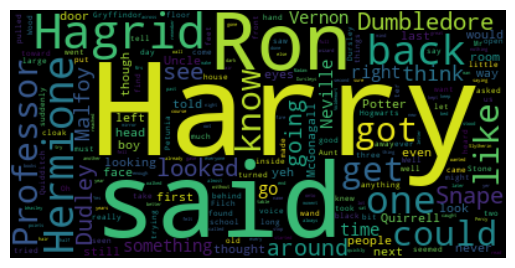

In [100]:
# 2.2

wordcloud2 = WordCloud().generate_from_frequencies(fdist)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

2.3 

***Compare the above two word clouds and what difference do you find? Please
clearly explain why.***

One difference that I noticed was that certain words such as "said" and "Harry" are visible in multiple places and with different sizes or frequencies. This anomoly is only present in the first wordcloud (2.1) and it is not present in the wordcloud produced using the frequency distribution (2.2).

The wordcloud in 2.1 also includes contractions like "I'm" and "he'd", while the second does not. That is because we removed punctuation during the data processing steps completed during task 1, and used that data to generate the word cloud in 2.2, while we only removed stop words for the 2.1 wordcloud.

## Task 3

3.1

***Based on your experience with these NLP tasks, please compare with text data processing and numeric data processing.***

Text data processing can be a little bit more involved than numeric data processing. Text data involves working with sequences of charcters or words of unstructered data which requires techniques like tokenization and lemmatization to process the data. Depending on the goal of the project, interpreting the results of text data can be more challenging than numeric data.

Numeric data on the other hand involves numerical values that are often organized in a structured format that allows for managing of outliers and missing values within the dataset. 